## Loading importent libraries for Data manupulation and visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.io import excel

## Reading Our Dataset

In [2]:
df=pd.read_excel('IDZ Digital data analyst (1) (4).xls')

### Reading first five row

In [3]:
df.head()

,First Name,Last Name,Gender,Age,Occupation,Salary,Marital Status,No. of Children
0,Jacob,Robinson,Male,58,Lawer,6779,Married,2
1,Grace,Taylor,Female,36,Insurer,4466,Married,1
2,Charlie,Wilson,Male,58,Aeroplane Pilot,5786,Single,0
3,Vanessa,Farrell,Female,23,Lawer,3403,Married,2
4,Fenton,Harrison,Male,21,Architect,693,Married,0


## Seeing some information about our dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   First Name        1000 non-null   object
 1    Last  Name       1000 non-null   object
 2    Gender           1000 non-null   object
 3    Age              1000 non-null   int64 
 4    Occupation       1000 non-null   object
 5    Salary           1000 non-null   int64 
 6    Marital Status   1000 non-null   object
 7    No. of Children  1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### *There are total 1000 entries and no null value to our dataset*
#### In our dataset there are only two datatype *Object*  and *Int*

### Total Columns in our dataset

In [6]:
df.columns.tolist()

['First Name',
 ' Last  Name',
 ' Gender',
 ' Age',
 ' Occupation',
 ' Salary',
 ' Marital Status',
 ' No. of Children']

In [7]:
len(df.columns.tolist())

8

### *In our dataset we have total 8 columns*

# Handling the duplicate

#### In this dataset we can not remove duplicate because its duplicate cantain a lot of information if we remove it then our machine learning model may be less accurate

# 1.Finding correlation using corr() function

###  Correlation coefficient can only be calculated on the numerical attributes (floats and integers), therefore, only the numeric attributes will be selected.

In [91]:
df_num=df.select_dtypes(include=['float64','int64'])
df_num_corr=df_num.corr()[' Salary'][:-1]
top_feature=df_num_corr[abs(df_num_corr)>0.5].sort_values(ascending=False)
print("There is total {} strongly correlated value:{}\n".format(len(top_feature),top_feature))

There is total 1 strongly correlated value: Salary    1.0
Name:  Salary, dtype: float64



### There is no correlated value with Salary

# 2.Log Transformation
### In this section we are going to see that our data is normally distributed or we have to perform log transformation

In [102]:
import warnings 
warnings.filterwarnings('ignore')

Skewness -0.011776


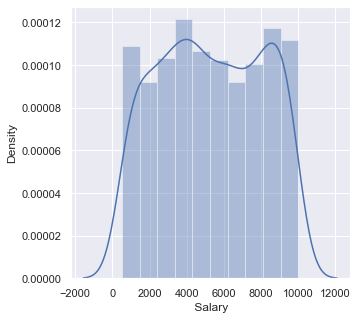

In [103]:
sns.set(rc={'figure.figsize':(5,5)})
sa_untransformed=sns.distplot(df[' Salary'])
print("Skewness %f" %df[' Salary'].skew())

Skewness -1.042796


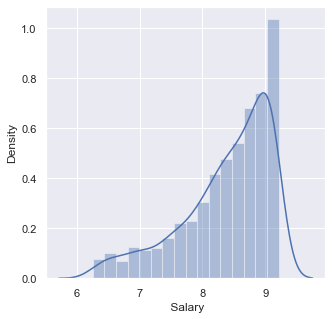

In [104]:
sa_transformed=np.log(df[' Salary'])
print("Skewness %f" %sa_transformed.skew())
sns.distplot(sa_transformed);

In [83]:
df['First Name'].value_counts()

Ryan         13
Tara         12
Arianna      11
Frederick    11
Julian       10
             ..
Dainton       1
Ellia         1
Abraham       1
Natalie       1
Amy           1
Name: First Name, Length: 206, dtype: int64

## 2. As we can see from above analysis that we have some similar first name

In [9]:
df.describe()

,Age,Salary,No. of Children
count,1000.000000,1000.000000,1000.000000
mean,39.536000,5303.460000,2.447000
std,12.477275,2761.864336,1.703553
min,18.000000,520.000000,0.000000
25%,29.000000,2955.500000,1.000000
50%,40.000000,5228.000000,2.000000
75%,50.000000,7814.750000,4.000000
max,60.000000,10000.000000,5.000000


# 4.Total male and female in our dataset

In [69]:
df[' Gender'].value_counts()

Male      514
Female    486
Name:  Gender, dtype: int64

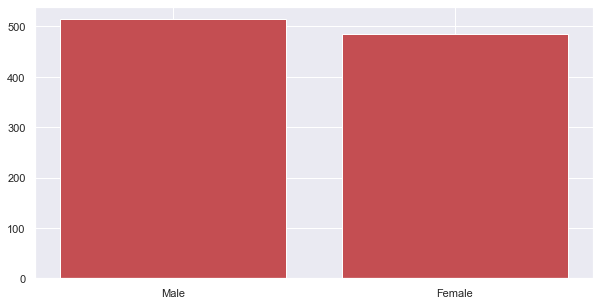

In [76]:
plt.figure(figsize=(10,5))
plt.bar(df[' Gender'].value_counts().keys(),df[' Gender'].value_counts(),color='r')
plt.show()

# 5.Total Married Person

In [39]:
married=df[df[' Marital Status']=='Married']

In [77]:
married

,First Name,Last Name,Gender,Age,Occupation,Salary,Marital Status,No. of Children
0,Jacob,Robinson,Male,58,Lawer,6779,Married,2
1,Grace,Taylor,Female,36,Insurer,4466,Married,1
3,Vanessa,Farrell,Female,23,Lawer,3403,Married,2
4,Fenton,Harrison,Male,21,Architect,693,Married,0
6,Belinda,Spencer,Female,24,Dancer,8927,Married,5
...,...,...,...,...,...,...,...,...
990,Adelaide,Montgomery,Female,25,Auditor,5217,Married,2
991,Rosie,Harper,Female,52,Meteorologist,9015,Married,0
994,Emily,Baker,Female,38,Social Worker,9116,Married,0
996,Lydia,Chapman,Female,21,Carpenter,4123,Married,0


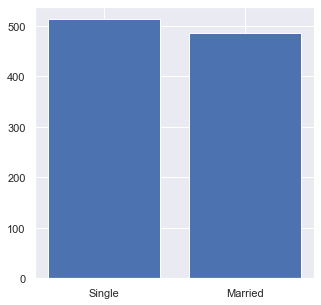

In [111]:
plt.bar(df[' Marital Status'].value_counts().keys(),df[' Marital Status'].value_counts())
plt.grid(True)
plt.show()

### From the above result we can easly say that *487* person are married

In [41]:
married[married[' No. of Children']>=1]

,First Name,Last Name,Gender,Age,Occupation,Salary,Marital Status,No. of Children
0,Jacob,Robinson,Male,58,Lawer,6779,Married,2
1,Grace,Taylor,Female,36,Insurer,4466,Married,1
3,Vanessa,Farrell,Female,23,Lawer,3403,Married,2
6,Belinda,Spencer,Female,24,Dancer,8927,Married,5
7,Ashton,Farrell,Male,30,Cook,916,Married,1
...,...,...,...,...,...,...,...,...
980,Oscar,Alexander,Male,44,Producer,7500,Married,1
981,Jessica,Fowler,Female,47,Hairdresser,1836,Married,4
983,Lucas,Jones,Male,54,Salesman,7428,Married,1
990,Adelaide,Montgomery,Female,25,Auditor,5217,Married,2


### 6.From This Analysis we find out that there is total *405* person who have atleast *One* Children

In [130]:
df

,First Name,Last Name,Gender,Age,Occupation,Salary,Marital Status,No. of Children
0,Jacob,Robinson,Male,58,Lawer,6779,Married,2
1,Grace,Taylor,Female,36,Insurer,4466,Married,1
2,Charlie,Wilson,Male,58,Aeroplane Pilot,5786,Single,0
3,Vanessa,Farrell,Female,23,Lawer,3403,Married,2
4,Fenton,Harrison,Male,21,Architect,693,Married,0
...,...,...,...,...,...,...,...,...
995,Alina,Cameron,Female,38,Florist,1432,Single,4
996,Lydia,Chapman,Female,21,Carpenter,4123,Married,0
997,Aiden,Chapman,Male,35,Historian,1753,Married,1
998,Rosie,Douglas,Female,21,Hairdresser,5982,Single,5


## 7. Total Occupation

In [231]:
df[' Occupation'].value_counts().sum()

1000

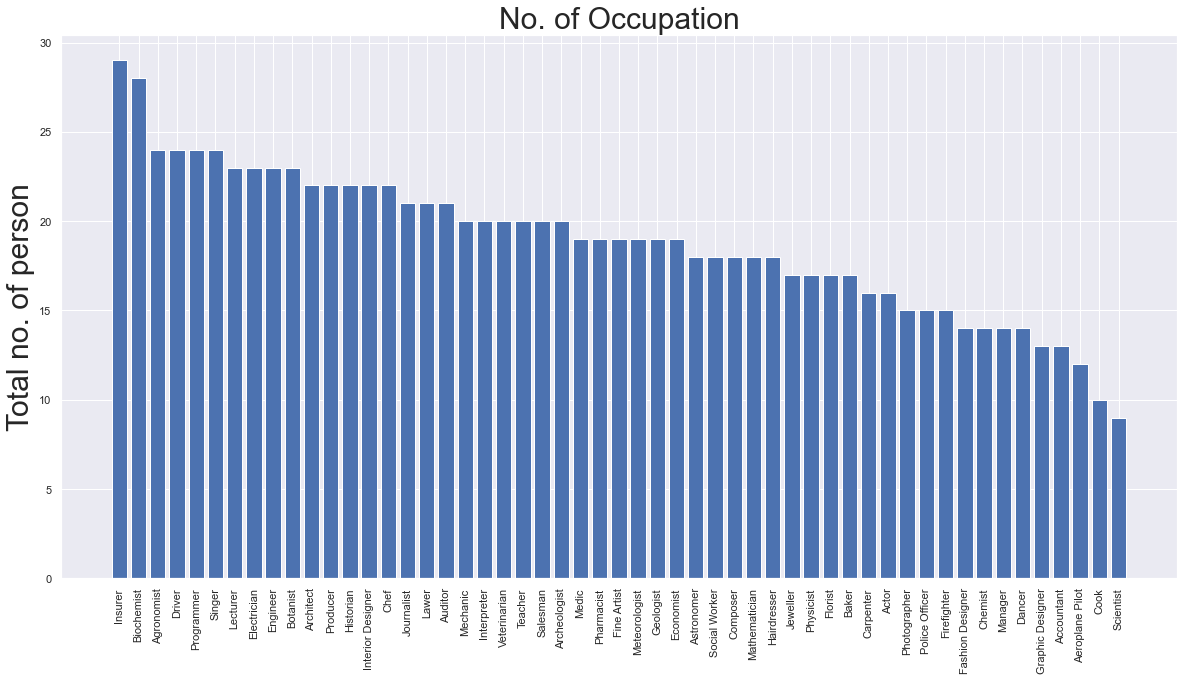

In [145]:
plt.figure(figsize=(20,10))
plt.bar(df[' Occupation'].value_counts().keys(),df[' Occupation'].value_counts())
plt.xticks(rotation=90)
plt.ylabel('Total no. of person',fontsize=30)
plt.title('No. of Occupation',fontsize=30)
plt.show()

In [150]:
single=df[df[' Marital Status']=='Single']
single

,First Name,Last Name,Gender,Age,Occupation,Salary,Marital Status,No. of Children
2,Charlie,Wilson,Male,58,Aeroplane Pilot,5786,Single,0
5,Lucas,Brooks,Male,38,Auditor,3029,Single,1
10,Alina,Russell,Female,51,Engineer,8411,Single,0
11,Tiana,Wright,Female,59,Composer,8087,Single,4
12,Kimberly,Rogers,Female,54,Geologist,7929,Single,2
...,...,...,...,...,...,...,...,...
992,Sophia,Ferguson,Female,48,Architect,9636,Single,5
993,Fenton,Stewart,Male,53,Programmer,1777,Single,5
995,Alina,Cameron,Female,38,Florist,1432,Single,4
998,Rosie,Douglas,Female,21,Hairdresser,5982,Single,5


## 8.There is total *513* person have *Single* marital Status

In [152]:
single[single[' No. of Children']>=1]

,First Name,Last Name,Gender,Age,Occupation,Salary,Marital Status,No. of Children
5,Lucas,Brooks,Male,38,Auditor,3029,Single,1
11,Tiana,Wright,Female,59,Composer,8087,Single,4
12,Kimberly,Rogers,Female,54,Geologist,7929,Single,2
13,Amelia,Craig,Female,55,Scientist,9278,Single,2
14,Connie,Martin,Female,56,Economist,7868,Single,1
...,...,...,...,...,...,...,...,...
989,Lucia,Holmes,Female,33,Firefighter,8618,Single,4
992,Sophia,Ferguson,Female,48,Architect,9636,Single,5
993,Fenton,Stewart,Male,53,Programmer,1777,Single,5
995,Alina,Cameron,Female,38,Florist,1432,Single,4


## 9.There is Total *425* person have minimum *One* children and their marital Status is *Single*


In [153]:
df[df[' No. of Children']==0]

,First Name,Last Name,Gender,Age,Occupation,Salary,Marital Status,No. of Children
2,Charlie,Wilson,Male,58,Aeroplane Pilot,5786,Single,0
4,Fenton,Harrison,Male,21,Architect,693,Married,0
10,Alina,Russell,Female,51,Engineer,8411,Single,0
21,Tiana,Farrell,Female,43,Programmer,5120,Single,0
27,Emily,Chapman,Female,46,Lawer,6890,Single,0
...,...,...,...,...,...,...,...,...
988,Anna,Tucker,Female,28,Architect,5528,Married,0
991,Rosie,Harper,Female,52,Meteorologist,9015,Married,0
994,Emily,Baker,Female,38,Social Worker,9116,Married,0
996,Lydia,Chapman,Female,21,Carpenter,4123,Married,0


## 10.From the above table we can say that total 170 person have *0* Children

In [160]:
df[' Salary'].sort_values(ascending=False)

152    10000
969     9999
204     9990
920     9990
261     9986
       ...  
403      540
270      524
46       523
155      521
308      520
Name:  Salary, Length: 1000, dtype: int64

In [208]:
maximum_salary=df.groupby([' Salary']).max().sort_values(ascending=False,by=' Salary')

In [209]:
maximum_salary

,First Name,Last Name,Gender,Age,Occupation,Marital Status,No. of Children
Salary,,,,,,,
10000,Myra,Grant,Female,47,Graphic Designer,Married,2
9999,Reid,Scott,Male,49,Meteorologist,Single,5
9990,David,Rogers,Male,45,Veterinarian,Married,3
9986,Maria,Crawford,Female,18,Physicist,Single,1
9974,Kirsten,Perry,Female,30,Meteorologist,Single,3
...,...,...,...,...,...,...,...
540,Myra,Montgomery,Female,60,Pharmacist,Married,3
524,Honey,Russell,Female,55,Veterinarian,Single,2
523,Alexia,Cooper,Female,29,Auditor,Married,0


### 11.From the above table we can say that Myra Grant have maximum Salary or we can say that Graphic Designer have maximum salary
### 12. Penelope have Minimum Salary

In [210]:
df[df[' Salary']==10000]

,First Name,Last Name,Gender,Age,Occupation,Salary,Marital Status,No. of Children
152,Myra,Grant,Female,47,Graphic Designer,10000,Married,2


In [211]:
df[df[" Salary"]==520]

,First Name,Last Name,Gender,Age,Occupation,Salary,Marital Status,No. of Children
308,Penelope,Henderson,Female,38,Singer,520,Single,5


# 13.Total Engineer in our dataset

In [212]:
engineer=df[df[' Occupation']=='Engineer']

In [213]:
engineer[' Occupation'].value_counts()

Engineer    23
Name:  Occupation, dtype: int64

### There is total 23 Engineer in our dataset like this we can see other no. of occupation

# 14.Person above 30 year

In [215]:
above_30=df[df[' Age']>30]

In [217]:
above_30[' Age'].value_counts().sum()

706

## There is total 706 people who is more than 30

In [225]:
df[' Salary'].value_counts().sort_values(ascending=True)

8853    1
6452    1
7282    1
8791    1
5011    1
       ..
7380    2
8604    2
6130    2
1458    2
9296    2
Name:  Salary, Length: 957, dtype: int64

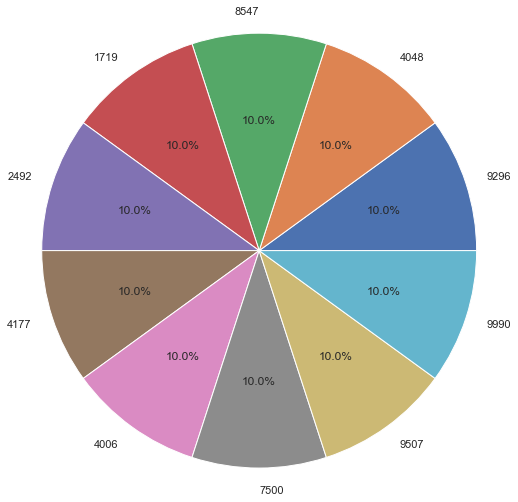

In [228]:
plt.pie(df[' Salary'].value_counts()[0:10],labels=df[' Salary'].value_counts()[0:10].keys(),autopct="%0.1f%%",radius=2)
plt.show()

### 15. As we can see from the pie chart that first 10 persons salary have equally distribute

# 16. Most occupation

In [232]:
df[' Occupation'].value_counts()[:10]

Insurer        29
Biochemist     28
Agronomist     24
Driver         24
Programmer     24
Singer         24
Lecturer       23
Electrician    23
Engineer       23
Botanist       23
Name:  Occupation, dtype: int64

## Most occuption is *INSURER*

## 17. Making a pie chart

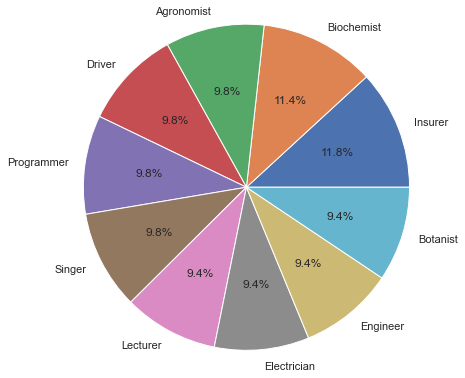

In [234]:
plt.pie(df[' Occupation'].value_counts()[0:10],labels=df[' Occupation'].value_counts()[0:10].keys(),autopct="%0.1f%%",radius=1.5)
plt.show()

## 18.Most Children

In [236]:
df[' No. of Children'].value_counts()

1    180
0    170
3    166
4    165
2    162
5    157
Name:  No. of Children, dtype: int64

## 19. Making donut chart

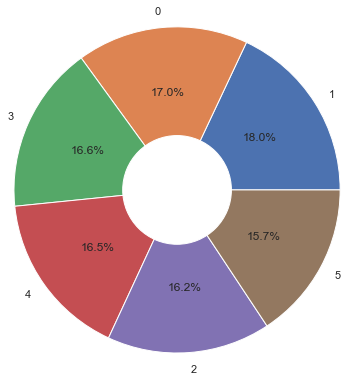

In [239]:
plt.pie(df[' No. of Children'].value_counts(),labels=df[' No. of Children'].value_counts().keys(),autopct="%0.1f%%",radius=1.5)
plt.pie([10],radius=0.5,colors='w')
plt.show()

## 20.From the above donut chart we can say that most people have *ONE* Children